<a href="https://colab.research.google.com/github/NastyaParnet/evolution/blob/main/Lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random as rn
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import choice as np_choice

class AntColony(object):

    def __init__(self, distances, n_ants, n_best, n_iterations, decay, alpha=1, beta=1):
        self.distances  = distances # квадратна матриця відстаней
        self.pheromone = np.ones(self.distances.shape) / len(distances)
        self.all_inds = range(len(distances))
        self.n_ants = n_ants # кількість мурах, що бігають за ітерацію
        self.n_best = n_best # кількість найкращих мурах, які відкладають феромон
        self.n_iterations = n_iterations # кількість ітерацій
        self.decay = decay # оцінка того, який феромон розпадається. 0.95 призведе до розпаду, 0.5 - до набагато швидшого розпаду
        self.alpha = alpha # коефіцієнт впливу на феромон, чим вища альфа, тим більшу вагу має феромон
        self.beta = beta # експонента від відстані, вища бета дає більшу вагу відстані

    def run(self):
        shortest_path = None
        plotY = []
        all_time_shortest_path = ("placeholder", np.inf)
        for i in range(self.n_iterations):
            all_paths = self.gen_all_paths()
            self.spread_pheromone(all_paths, self.n_best, shortest_path=shortest_path)
            shortest_path = min(all_paths, key=lambda x: x[1])
            plotY.append(shortest_path[1])
            print (shortest_path)
            if shortest_path[1] < all_time_shortest_path[1]:
                all_time_shortest_path = shortest_path            
            self.pheromone = self.pheromone * self.decay   
        plt.plot(plotY)
        plt.show()         
        return all_time_shortest_path

    def spread_pheromone(self, all_paths, n_best, shortest_path):
        sorted_paths = sorted(all_paths, key=lambda x: x[1])
        for path, dist in sorted_paths[:n_best]:
            for move in path:
                self.pheromone[move] += 1.0 / self.distances[move]

    def gen_path_dist(self, path):
        total_dist = 0
        for ele in path:
            total_dist += self.distances[ele]
        return total_dist

    def gen_all_paths(self):
        all_paths = []
        for i in range(self.n_ants):
            path = self.gen_path(0)
            all_paths.append((path, self.gen_path_dist(path)))
        return all_paths

    def gen_path(self, start):
        path = []
        visited = set()
        visited.add(start)
        prev = start
        for i in range(len(self.distances) - 1):
            move = self.pick_move(self.pheromone[prev], self.distances[prev], visited)
            path.append((prev, move))
            prev = move
            visited.add(move)
        path.append((prev, start))
        return path

    def pick_move(self, pheromone, dist, visited):
        pheromone = np.copy(pheromone)
        pheromone[list(visited)] = 0

        row = pheromone ** self.alpha * (( 1.0 / dist) ** self.beta)

        norm_row = row / row.sum()
        move = np_choice(self.all_inds, 1, p=norm_row)[0]
        return move



([(0, 3), (3, 10), (10, 5), (5, 18), (18, 21), (21, 14), (14, 9), (9, 6), (6, 24), (24, 23), (23, 17), (17, 22), (22, 15), (15, 4), (4, 1), (1, 2), (2, 8), (8, 7), (7, 16), (16, 13), (13, 20), (20, 11), (11, 12), (12, 19), (19, 0)], 8848.0)
([(0, 21), (21, 3), (3, 6), (6, 23), (23, 12), (12, 11), (11, 20), (20, 15), (15, 1), (1, 4), (4, 8), (8, 2), (2, 24), (24, 14), (14, 9), (9, 10), (10, 5), (5, 17), (17, 18), (18, 16), (16, 19), (19, 13), (13, 22), (22, 7), (7, 0)], 7265.0)
([(0, 21), (21, 23), (23, 10), (10, 5), (5, 17), (17, 18), (18, 9), (9, 14), (14, 3), (3, 24), (24, 6), (6, 22), (22, 7), (7, 4), (4, 1), (1, 19), (19, 13), (13, 16), (16, 8), (8, 2), (2, 15), (15, 12), (12, 11), (11, 20), (20, 0)], 5676.0)
([(0, 21), (21, 14), (14, 9), (9, 10), (10, 18), (18, 13), (13, 19), (19, 16), (16, 8), (8, 2), (2, 1), (1, 4), (4, 7), (7, 22), (22, 6), (6, 24), (24, 12), (12, 11), (11, 20), (20, 15), (15, 3), (3, 23), (23, 17), (17, 5), (5, 0)], 6567.0)
([(0, 21), (21, 17), (17, 10), (10, 

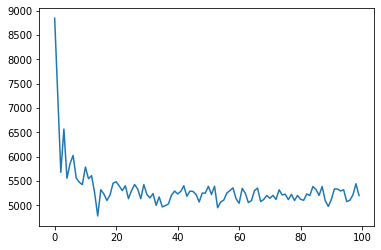

shorted_path: ([(0, 21), (21, 17), (17, 23), (23, 5), (5, 18), (18, 10), (10, 9), (9, 14), (14, 3), (3, 6), (6, 24), (24, 22), (22, 7), (7, 13), (13, 19), (19, 16), (16, 8), (8, 2), (2, 4), (4, 1), (1, 15), (15, 20), (20, 11), (11, 12), (12, 0)], 4779.0)
--- 13.227828979492188 seconds ---


In [ ]:
import numpy as np
import time

distances = np.array([[np.inf, 645, 868, 125, 748, 366, 256, 316, 1057, 382, 360, 471, 428, 593, 311, 844, 602, 232, 575, 734, 521, 120, 343, 312, 396],
                      [645, np.inf, 252, 664, 81, 901, 533, 294, 394, 805, 975, 343, 468, 196, 957, 446, 430, 877, 1130, 213, 376, 765, 324, 891, 672],
                      [868, 252, np.inf, 858, 217, 1171, 727, 520, 148, 1111, 1221, 611, 731, 390, 1045, 591, 706, 1100, 1391, 335, 560, 988, 547, 1141, 867],
                      [125, 664, 858, np.inf, 738, 431, 131, 407, 1182, 257, 423, 677, 557, 468, 187, 803, 477, 298, 671, 690, 624, 185, 321, 389, 271],
                      [748, 81, 217, 738, np.inf, 1119, 607, 303, 365, 681, 833, 377, 497, 270, 925, 365, 477, 977, 1488, 287, 297, 875, 405, 957, 747],
                      [366, 901, 1171, 431, 1119, np.inf, 561, 618, 1402, 328, 135, 747, 627, 898, 296, 1070, 908, 134, 280, 1040, 798, 246, 709, 143, 701],
                      [256, 533, 727, 131, 607, 561, np.inf, 298, 811, 388, 550, 490, 489, 337, 318, 972, 346, 427, 806, 478, 551, 315, 190, 538, 149],
                      [316, 294, 520, 407, 303, 618, 298, np.inf, 668, 664, 710, 174, 294, 246, 627, 570, 506, 547, 883, 387, 225, 435, 126, 637, 363],
                      [1057, 394, 148, 1182, 365, 1402, 811, 668, np.inf, 1199, 1379, 857, 977, 474, 1129, 739, 253, 1289, 1539, 333, 806, 1177, 706, 1292, 951],
                      [382, 805, 1111, 257, 681, 328, 388, 664, 1199, np.inf, 152, 780, 856, 725, 70, 1052, 734, 159, 413, 866, 869, 263, 578, 336, 949],
                      [360, 975, 1221, 423, 833, 135, 550, 710, 1379, 152, np.inf, 850, 970, 891, 232, 1173, 896, 128, 261, 1028, 1141, 240, 740, 278, 690],
                      [471, 343, 611, 677, 377, 747, 490, 174, 857, 780, 850, np.inf, 120, 420, 864, 282, 681, 754, 999, 556, 51, 590, 300, 642, 640],
                      [428, 468, 731, 557, 497, 627, 489, 294, 977, 856, 970, 120, np.inf, 540, 741, 392, 800, 660, 1009, 831, 171, 548, 420, 515, 529],
                      [593, 196, 390, 468, 270, 898, 337, 246, 474, 725, 891, 420, 540, np.inf, 665, 635, 261, 825, 1149, 141, 471, 653, 279, 892, 477],
                      [311, 957, 1045, 187, 925, 296, 318, 627, 1129, 70, 232, 864, 741, 665, np.inf, 1157, 664, 162, 484, 805, 834, 193, 508, 331, 458],
                      [844, 446, 591, 803, 365, 1070, 972, 570, 739, 1052, 1173, 282, 392, 635, 1157, np.inf, 896, 1097, 1363, 652, 221, 964, 696, 981, 1112],
                      [602, 430, 706, 477, 477, 908, 346, 506, 253, 734, 896, 681, 800, 261, 664, 896, np.inf, 774, 1138, 190, 732, 662, 540, 883, 350],
                      [232, 877, 1100, 298, 977, 134, 427, 547, 1289, 159, 128, 754, 660, 825, 162, 1097, 774, np.inf, 338, 987, 831, 112, 575, 176, 568],
                      [575, 1130, 1391, 671, 1488, 280, 806, 883, 1539, 413, 261, 999, 1009, 1149, 484, 1363, 1138, 338, np.inf, 1299, 1065, 455, 984, 444, 951],
                      [734, 213, 335, 690, 287, 1040, 478, 387, 333, 866, 1028, 556, 831, 141, 805, 652, 190, 987, 1299, np.inf, 576, 854, 420, 1036, 608],
                      [521, 376, 560, 624, 297, 798, 551, 225, 806, 869, 1141, 51, 171, 471, 834, 221, 732, 831, 1065, 576, np.inf, 641, 351, 713, 691],
                      [120, 765, 988, 185, 875, 246, 315, 435, 1177, 263, 240, 590, 548, 653, 193, 964, 662, 112, 455, 854, 641, np.inf, 463, 190, 455],
                      [343, 324, 547, 321, 405, 709, 190, 126, 706, 578, 740, 300, 420, 279, 508, 696, 540, 575, 984, 420, 351, 463, np.inf, 660, 330],
                      [312, 891, 1141, 389, 957, 143, 538, 637, 1292, 336, 278, 642, 515, 892, 331, 981, 883, 176, 444, 1036, 713, 190, 660, np.inf, 695],
                      [396, 672, 867, 271, 747, 701, 149, 363, 951, 949, 690, 640, 529, 477, 458, 1112, 350, 568, 951, 608, 691, 455, 330, 695, np.inf]
                      ])

ant_colony = AntColony(distances, 100, 100, 100, 0.95, alpha=1, beta=1)
start_time = time.time()
shortest_path = ant_colony.run()
print ("shorted_path: {}".format(shortest_path))
print("--- %s seconds ---" % (time.time() - start_time))
